In [1]:
import matplotlib.pyplot as plt
from scipy.stats.stats import ttest_ind
import pandas as pd
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from pylab import rcParams
import plotly.express as px
import warnings;
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [2]:
weather = pd.read_csv("weatherHistory.csv")
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 7.4+ MB


In [4]:
weather['Temperature (C)']

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

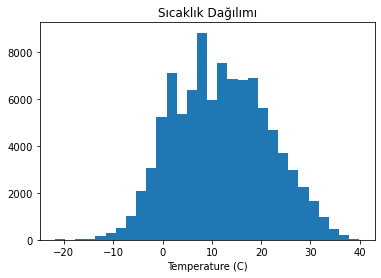

In [5]:
plt.hist(weather['Temperature (C)'], bins=30)
plt.title("Sıcaklık Dağılımı")
plt.xlabel("Temperature (C)")
plt.show()

In [6]:
Y = weather["Temperature (C)"] - weather["Apparent Temperature (C)"]
X = weather[["Humidity","Wind Speed (km/h)"]]

In [7]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [3.02918594 0.11929075]
Sabit değer (bias): 
 -2.4381054151877897


In [9]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:13:17   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
results.params

const               -2.438105
Humidity             3.029186
Wind Speed (km/h)    0.119291
dtype: float64

In [11]:
X["Humidity * Wind Speed "] = X["Humidity"] * X["Wind Speed (km/h)"] 

In [12]:
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:13:17   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0839      0.033     -2.511      0.012      -0.149      -0.018
Humidity                  -0.1775      0.043     -4.133      0.000      -0.262      -0.093
Wind Speed (km/h)         -0.0905      0.002    -36.797      0.000      -0.095      -0.086
Humidity * Wind Speed      0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
results.params

const                    -0.083936
Humidity                 -0.177512
Wind Speed (km/h)        -0.090482
Humidity * Wind Speed     0.297119
dtype: float64

In [14]:
Y = weather["Temperature (C)"] - weather["Apparent Temperature (C)"]
X = weather[["Humidity","Wind Speed (km/h)", "Visibility (km)"]]

In [15]:
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.490
Model:                            OLS   Adj. R-squared (uncentered):              0.490
Method:                 Least Squares   F-statistic:                          3.094e+04
Date:                Fri, 24 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:13:18   Log-Likelihood:                     -1.7096e+05
No. Observations:               96453   AIC:                                  3.419e+05
Df Residuals:                   96450   BIC:                                  3.419e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Humidity              1.3488      0.012    108.590      0.000       1.324       1.373
Wind Speed (km/h)     0.1052      0.001    167.634      0.000       0.104       0.106
Visibility (km)      -0.0976      0.001   -110.936      0.000      -0.099      -0.096
==============================================================================
Omnibus:                     5476.521   Durbin-Watson:                   0.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6619.177
Skew:                           0.587   Prob(JB):                         0.00
Kurtosis:                       3.519   Cond. No.                         43.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X["Humidity * Wind Speed "] = X["Humidity"] * X["Wind Speed (km/h)"] 

In [17]:
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.545
Model:                            OLS   Adj. R-squared (uncentered):              0.545
Method:                 Least Squares   F-statistic:                          2.894e+04
Date:                Fri, 24 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:14:00   Log-Likelihood:                     -1.6544e+05
No. Observations:               96453   AIC:                                  3.309e+05
Df Residuals:                   96449   BIC:                                  3.309e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Humidity                   0.2825      0.015     18.437      0.000       0.253       0.313
Wind Speed (km/h)         -0.0501      0.002    -32.259      0.000      -0.053      -0.047
Visibility (km)           -0.0479      0.001    -50.450      0.000      -0.050      -0.046
Humidity * Wind Speed      0.2479      0.002    108.123      0.000       0.243       0.252
==============================================================================
Omnibus:                     4515.631   Durbin-Watson:                   0.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9035.207
Skew:                           0.341   Prob(JB):                         0.00
Kurtosis:                       4.335   Cond. No.                         65.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""